In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.uniform(-100,100, [100,1])

Y = np.random.uniform(-100,100, [100,1])

Y[X>0] = 1
Y[X<0] = 0

In [2]:
sigmoid = lambda t: 1/ (1+np.e**-t)

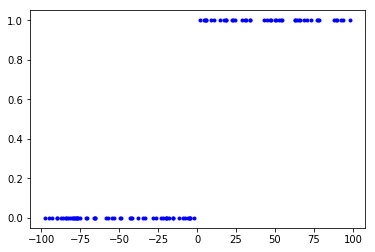

In [3]:
plt.plot(X, Y, 'b.')

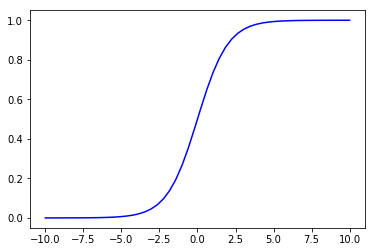

In [4]:
#Sigomid function
sig = np.linspace(-10,10,50)
plt.plot(sig, sigmoid(sig), 'b-')

$-log(p)$ if y = 1 </br>
$-log(1-p)$ if y = 0

In [5]:
class LogisticRegression_():
    def __init__(self, lr = 0.1):
        self.lr = lr
        
    def fit(self, train, train_labels):
        self.train_b = np.hstack((np.ones((len(train), 1)), train))
        self.train_labels = train_labels
        self.weights = np.zeros((self.train_b.shape[1],1))
        self.m = len(train)
        
        for i in range(100):
            gradients = (1/self.m) * self.train_b.T.dot(sigmoid(self.train_b.dot(self.weights)) - self.train_labels)
            self.weights -= gradients * self.lr
            
    def predict(self, test):
        try:
            self.test_b = np.hstack((np.ones((len(test), 1)), test))
        except ValueError:
            self.test_b = np.hstack((np.ones((len(test), 1)), [test]))
        print(self.weights)
        score = self.test_b.dot(self.weights)
        return [1 if sigmoid(score[i]) > 0.5 else 0 for i in range(len(score))]
        
            
            

In [6]:
log_reg = LogisticRegression_()

In [11]:
log_reg.fit(X, Y)
predicted = log_reg.predict([0.25])
print(predicted)

[[-0.00437265]
 [ 2.46876639]]
[1]


<h1>Logistic regression with sklean and iris dataset</h1>

In [20]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [21]:
iris = load_iris()

In [29]:
X = iris['data'][:,2:]
# X = X.reshape(-1,1)
y = (iris['target'] == 2).astype(np.int)
y = y.reshape(-1,1)

In [24]:
log_reg_sk = LogisticRegression()
log_reg_sk.fit(X, y)

log_reg_sk.predict([[5, 2]])
log_reg_sk.coef_, log_reg_sk.intercept_

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([[ 0.04030798,  2.5339354 ]]), array([-4.27691117]))

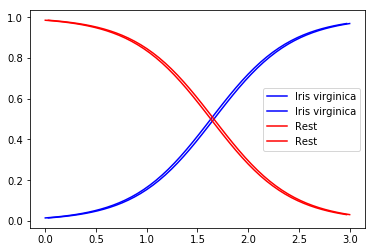

In [33]:
X_new = np.linspace(0,3,100).reshape(50,2)

y_proba = log_reg_sk.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], 'b-', label = 'Iris virginica')
plt.plot(X_new, y_proba[:,0], 'r-', label = 'Rest')
plt.legend()
plt.show()